In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

### Linear Regression

In [2]:
x_values = np.load("datasets/x_values.npy")
y_values = np.load("datasets/y_values.npy")

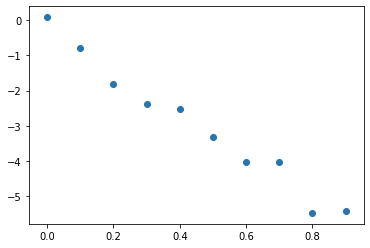

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_values, y_values, label="Observed data")

In [4]:
regressor = LinearRegression()

In [5]:
linRegMod = regressor.fit(x_values, y_values)

In [6]:
linRegMod_score = linRegMod.score(x_values, y_values)

In [7]:
y_pred = linRegMod.predict(x_values)

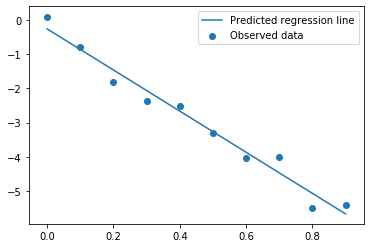

In [8]:
ax.plot(x_values, y_pred, label="Predicted regression line")
ax.legend(loc="upper right")
fig

In [9]:
y_specific = linRegMod.predict(np.array([0.48]).reshape(-1, 1))

In [10]:
y_specific

array([[-3.14442237]])

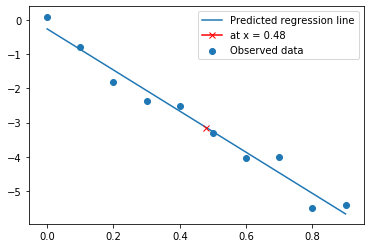

In [11]:
ax.plot(np.array([0.48]).reshape(-1, 1),
        y_specific, 
        label="at x = 0.48",
        marker='x',
        c='r')
ax.legend(loc="upper right")
fig

### Principle Component Analysis

In [12]:
wineData = np.load("datasets/wineData.npy")
wineLabels = np.load("datasets/wineLabels.npy")

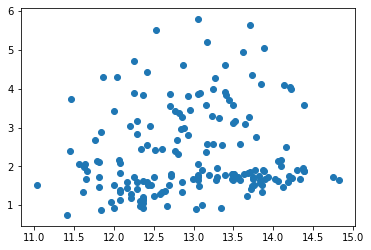

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(wineData[:,0], 
            wineData[:,1], 
            label="Observed data")

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(wineData, 
                                                    wineLabels,
                                                    test_size=0.20)

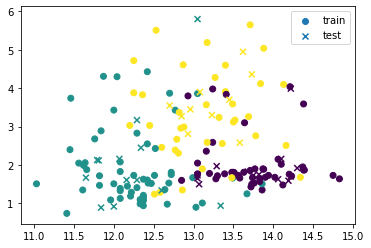

In [15]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.scatter(X_train[:,0], 
            X_train[:,1], 
            marker='o', 
            c=Y_train,
            label="train")
ax2.scatter(X_test[:,0], 
            X_test[:,1], 
            marker='x', 
            c=Y_test,
            label="test")
ax2.legend(loc="upper right")

In [16]:
pca = PCA(n_components=2)

In [17]:
x_pca = pca.fit(X_train)
x_train_reduced = x_pca.transform(X_train)
x_test_reduced = x_pca.transform(X_test)

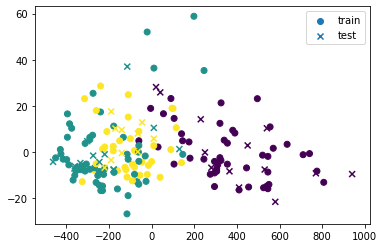

In [18]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(x_train_reduced[:,0], 
            x_train_reduced[:,1],
            marker='o', 
            c=Y_train,
            label="train")
ax3.scatter(x_test_reduced[:,0], 
            x_test_reduced[:,1], 
            marker='x', 
            c=Y_test,
            label="test")
ax3.legend(loc="upper right")

### Linear Discriminant Analysis

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [20]:
x_lda = lda.fit(X_train, Y_train)
x_train_lda = x_lda.transform(X_train)
x_test_lda = x_lda.transform(X_test)

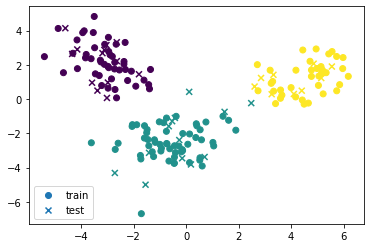

In [21]:
fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.scatter(x_train_lda[:,0], 
            x_train_lda[:,1],
            marker='o',
            c=Y_train,
            label="train")
ax4.scatter(x_test_lda[:,0], 
            x_test_lda[:,1], 
            marker='x', 
            c=Y_test,
            label="test")
ax4.legend(loc="lower left")

### Principal Compnent Analysis from scratch

In [22]:
def PCA_by_hand(x, n_components, mean_vector=np.array([0])):
    
    if not mean_vector.all():
        mean_vector = np.mean(x, axis=0)

    centred_data = x - mean_vector
    u, s, vh = np.linalg.svd(centred_data)
    projection_matrix = vh[:n_components, :]
    projection_data = centred_data @ np.transpose(projection_matrix)
    
    return projection_data, mean_vector

In [23]:
projection_train_data, mean_train_vector = PCA_by_hand(X_train, 2)

In [24]:
projection_test_data, _ = PCA_by_hand(X_test, 2, mean_train_vector)

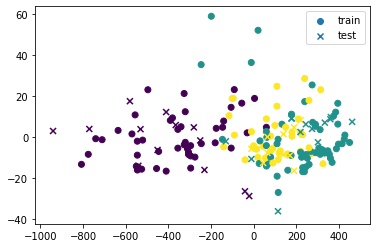

In [25]:
fig4 = plt.figure()
ax4 = fig4.add_subplot()
ax4.scatter(projection_train_data[:,0], 
            projection_train_data[:,1],
            marker='o', 
            c=Y_train,
            label="train")
ax4.scatter(projection_test_data[:,0], 
            projection_test_data[:,1], 
            marker='x', 
            c=Y_test,
            label="test")
ax4.legend(loc="upper right")

### Applying knowledge to a random dataset

In [26]:
task3_5_data = np.load("datasets/task3_5_data.npy")
task3_5_labels = np.load("datasets/task3_5_labels.npy")

Text(0.5, 1.0, 'Explained Variance Ratio')

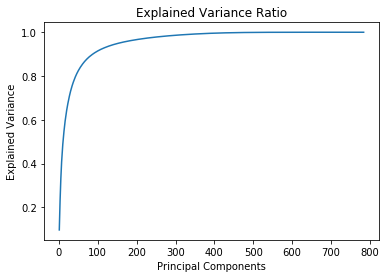

In [27]:
pca = PCA()

pca.fit(task3_5_data)

x=range(1, pca.explained_variance_ratio_.shape[0] + 1)
y=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')


In [28]:
for i in range(len(y)):
    if y[i] > 0.9:
        optimal_n_components = i
        break

In [29]:
optimal_n_components

86

In [30]:
pca_3_5 = PCA(n_components=86)

x_task_3_5 = pca_3_5.fit_transform(task3_5_data)

Text(0.5, 1.0, 'task_3_5 PCA n_components 86')

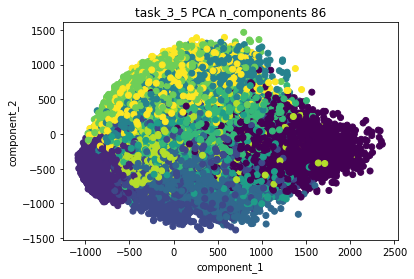

In [33]:
fig5 = plt.figure()
ax5 = fig5.add_subplot()
ax5.scatter(x_task_3_5[:,0], 
            x_task_3_5[:,1],
            marker='o', 
            c=task3_5_labels,
            )
plt.ylabel('component_2')
plt.xlabel('component_1')
plt.title("task_3_5 PCA n_components 86")